#### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Sneak Peek into data

In [3]:
df_desc = pd.read_excel('data_dictionary_v1 .xlsx')

df_desc[0:50]
# v1 to v50 are only present in training dataset as a columns

,Rename,description
0,v1,# NEGATIVE EVENTS IN LAST 6 MONTHS (LOANS)
1,v2,AVG. MONTHLY CREDIT TRANSACTIONS AMOUNT LAST 1...
2,v3,AVG. OF MINIMUM BALANCE PER MONTH LAST 360 DAYS
3,v4,# RECHARGES LAST 150-180 DAYS
4,v5,count_debit_transactions_last_360_days
5,v6,CUMULATIVE MAXIMUM BALANCE LAST 30 DAYS
6,v7,# RECHARGES WITH RECHARGE AMOUNTS MORE THAN 20...
7,v8,AVG. MONTHLY FIXED LINE BILL AMOUNT LAST 30 DAYS
8,v9,# UTILITIES PAYING BILLS FOR
9,v10,LOAN DISBURSEMENT AMOUNT LAST 180 DAYS


In [4]:
df_desc[0:50]
# v1 to v50 are only present in training dataset as a columns

,Rename,description
0,v1,# NEGATIVE EVENTS IN LAST 6 MONTHS (LOANS)
1,v2,AVG. MONTHLY CREDIT TRANSACTIONS AMOUNT LAST 1...
2,v3,AVG. OF MINIMUM BALANCE PER MONTH LAST 360 DAYS
3,v4,# RECHARGES LAST 150-180 DAYS
4,v5,count_debit_transactions_last_360_days
5,v6,CUMULATIVE MAXIMUM BALANCE LAST 30 DAYS
6,v7,# RECHARGES WITH RECHARGE AMOUNTS MORE THAN 20...
7,v8,AVG. MONTHLY FIXED LINE BILL AMOUNT LAST 30 DAYS
8,v9,# UTILITIES PAYING BILLS FOR
9,v10,LOAN DISBURSEMENT AMOUNT LAST 180 DAYS


In [5]:
df = pd.read_csv('dataset - v2.csv')

df['label'].unique(), df['default'].unique(), df.label.value_counts()

(array(['modeling', 'oot'], dtype=object),
 array([ 0.,  1., nan]),
 modeling    4661
 oot         1585
 Name: label, dtype: int64)

In [6]:
df['label'].unique(), df['default'].unique(), df.label.value_counts()

(array(['modeling', 'oot'], dtype=object),
 array([ 0.,  1., nan]),
 modeling    4661
 oot         1585
 Name: label, dtype: int64)

#### Test and Train Split

In [7]:
df_tr = df.loc[df.label=='modeling'] # for crossvalidation and hyperparameter tuning

df_test = df.loc[df.label=='oot']
## bifurcating train and test based on label, for the time being splittng train into validation data 
## while using k-fold crossvalidation, whole train data

In [8]:
df.shape, df_tr.shape, df_test.shape

((6246, 62), (4661, 62), (1585, 62))

####  Categorical Columns

In [9]:
### Check for categorical values
print('-------Categorical Columns-------')
cat_col = []
for col in df_tr.columns:
    if(df_tr[col].dtype=='object'):
        print(col, df_tr[col].nunique())
        cat_col.append(col)

### will remove decision id since its an identifier for a datapoint
### Label is our output variable
### drop brand, carrier, device_name, gms_version, manufacturer because of high number of categorical value for 5000 recods.

df_tr.drop(['label', 'brand' ,'carrier', 'device_name', 'gms_version', 'manufacturer'], axis = 1, inplace = True)
df_test.drop(['label', 'brand' ,'carrier', 'device_name', 'gms_version', 'manufacturer'], axis = 1, inplace = True)

cat_col = ['network_type', 'screen_dpi']
print('\n categorical column', cat_col)

-------Categorical Columns-------
decision_id 4661
label 1
brand 135
carrier 40
device_name 558
gms_version 309
manufacturer 137
network_type 6
screen_dpi 5

 categorical column ['network_type', 'screen_dpi']


#### Numeric Columns

In [10]:
#print('-----Numerical Columns-----')
num_col = []
for col in df_tr.columns:
    if(df_tr[col].dtype!='object'):
        #print(col)
        num_col.append(col)    

In [11]:
for col in num_col:
    print('{}---{}'.format(col,df_tr[col].nunique()))

default---2
v1---24
v2---3894
v3---3792
v4---8
v5---396
v6---3456
v7---6
v8---36
v9---26
v10---714
v11---2960
v12---3851
v13---15
v14---2876
v15---3578
v16---109
v17---300
v18---2
v19---8
v20---4
v21---3
v22---4
v23---3800
v24---1926
v25---27
v26---4
v27---1127
v28---3864
v29---5
v30---3915
v31---509
v32---450
v33---68
v34---2
v35---3
v36---65
v37---85
v38---3843
v39---3513
v40---5
v41---3827
v42---7
v43---3889
v44---15
v45---683
v46---138
v47---3
v48---3222
v49---82
v50---3
screen_height---261
screen_width---12


###### by checking the no of unique values, v18 and v34 seems to be categorical and as per description its a flag. Since it contains only two values, median and mode will be same and we can safely consider them numerical val

In [12]:
# col1 = ['default','v18', 'v34']
# num_col_upd = [i for i in num_col if i not in col1]
# cat_col_temp.extend(col1)
# ## Note default is output variable and label is to just segregate training and test data

In [13]:
# col2 = ['label', 'default']
# cat_col_temp2 = [i for i in cat_col_temp if i not in col2]
# cat_col_upd = ['default']
# cat_col_upd.extend(cat_col_temp2)

In [14]:
# cat_col_upd

In [15]:
# df_tr.shape[1], len(cat_col_upd), len(num_col_upd)
# ### Removed decision_id and label columns as decision id is simply an identifier[primary key], and label is
# ### for bifurcating train and test data

### Null value analysis

#### 1) Checking for the rows having high no of null values

In [16]:
df_tr.isna().sum(axis=1).sort_values(ascending=False)

1054    54
4140    54
63      54
537     50
278     50
1092    50
2473    50
2544    50
4598    50
264     50
4405    50
3615    50
1489    49
2570    49
2567    49
4242    49
4244    49
2480    49
4247    49
681     49
4260    49
1475    49
2462    49
2410    49
2603    49
2514    49
4217    49
637     49
2801    49
4152    49
4572    49
2791    49
2751    49
4176    49
1033    49
153     49
602     49
2725    49
2706    49
4192    49
2700    49
2374    49
4559    49
2396    49
4328    49
2255    49
1887    49
2033    49
2024    49
833     49
4513    49
1924    49
1920    49
859     49
1833    49
994     49
1803    49
1798    49
4465    49
4473    49
1709    49
1662    49
4481    49
4385    49
1598    49
2055    49
2066    49
2239    49
4577    49
1524    49
2205    49
2194    49
2175    49
1539    49
2154    49
977     49
798     49
90      49
2088    49
807     49
2076    49
2071    49
2808    49
4579    49
162     49
368     49
1213    49
3947    49
393     49
3415    49
3377    49

In [17]:
df_tr[df_tr.isna().sum(axis=1)>=40] 
# the no 40 is taken by scree plot inspiration

,decision_id,default,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,network_type,screen_height,screen_width,screen_dpi
13,26e6163c-aab3-4aff-9fb3-64987ba47239,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18176.610910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4G,1920.0,1080.0,xxhdpi
41,47a27876-e766-4347-a244-61e35eadea35,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.637111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown_0,2290.0,1080.0,xhdpi
63,08a8bc66-a2fe-4295-9b28-60acc175315b,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,2695065e-365e-4ebb-b99a-3a28b0cda30e,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.431335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown_0,2131.0,1080.0,xhdpi
153,e99af599-6234-4282-b4af-d963133ee7be,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7548.636026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown_0,2110.0,1080.0,xhdpi
162,43d00cc7-1b20-4d6f-93bb-91a6f897d1b1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334.089251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4G,1407.0,720.0,xhdpi
211,03a424e8-5e94-423b-a2c3-641bc6a28e4d,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118366.952100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown_0,2208.0,1080.0,xhdpi
220,42b1a48f-4839-45a0-85bd-2bcfecf08b49,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2745.899600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown_0,2016.0,1080.0,xxhdpi
264,568b0404-00d9-46d6-b45b-b88bd4a040b2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4G,1920.0,1080.0,xhdpi
278,7c37efe8-c4b9-45f1-b76b-5e33b6f7fad3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown_0,2128.0,1080.0,xxhdpi


###### Removing rows with null values grater than 40

In [18]:
len(df_tr[df_tr.isna().sum(axis=1)>=40])*100/len(df_tr)

3.261102767646428

###### we can safely remove those data points as its very less no (<3.5 % of total training data)

In [19]:
def row_remove(df, cut = 40):
    df_rough = df.copy()
    row_rem = list(df[df.isna().sum(axis=1)>=cut].index)
    df_rough.drop(row_rem, axis=0, inplace=True)
    return(df_rough)

In [20]:
print(df_tr.shape)


(4661, 56)


In [21]:
df_tr = row_remove(df_tr, 40)


In [22]:
print(df_tr.shape)


(4509, 56)


#### 2) Checking null count percentage

In [23]:
df_tr.isna().mean().sort_values(ascending = False)

v27              0.297405
v1               0.174096
v44              0.174096
v45              0.174096
v38              0.160568
v46              0.118652
v33              0.111111
v49              0.108450
v48              0.097139
v10              0.074518
v50              0.074518
v42              0.074518
v21              0.074518
v24              0.074518
v19              0.074518
v25              0.074518
v35              0.074518
v18              0.074518
v34              0.074518
v39              0.056775
v6               0.055223
screen_width     0.050787
screen_dpi       0.050787
screen_height    0.050787
network_type     0.050787
v8               0.025061
v32              0.017077
v17              0.015746
v14              0.015303
v9               0.014637
v4               0.014637
v13              0.014637
v7               0.014637
v29              0.014637
v3               0.001774
v41              0.001774
v12              0.000222
v2               0.000000
default     

###### Rather than imputing blindly with median on numeric columns and categorical with mode, we should create a flag varaiable indicating a null value being imputed for variables/features with null value greater than 20 percent i.e --> --> ['v27','v1','v44','v45']

In [24]:
## Transformation
def null_col_flag(df, cols):
    for col in cols:
        df[col+'_nflag'] = df[col].apply(lambda x: np.where(np.isnan(x), 1, 0))
    return(df)

In [25]:
df_tr = null_col_flag(df_tr, ['v27','v1','v44','v45'])
df_test = null_col_flag(df_test, ['v27','v1','v44','v45'])

In [26]:
df_tr.shape, df_test.shape

((4509, 60), (1585, 60))

### Null Value Imputation

In [27]:
ignore_col = ['default']

In [28]:
df_tr['v18'].unique()

array([ 0., nan,  1.])

In [29]:
df_tr['v34'].unique()

array([ 0., nan,  1.])

In [30]:
def data_impute(df, impute_dict = {}):
        if(len(list(impute_dict.keys()))==0):
            for col in df.columns:
                if col == 'decision_id':
                    continue
                if col in cat_col:
                    impute_dict[col] = df[col].mode()[0]
                else:
                    impute_dict[col] = df[col].median()
        for col in df.columns:
            if col == 'decision_id':
                continue
            impute_val = impute_dict[col]
            df[col].fillna(impute_val, inplace = True)
        
        
        return df, impute_dict

In [31]:
df_tr, dict_med = data_impute(df_tr)

df_test, _ = data_impute(df_test, dict_med)

### Exploratory Data Analysis

In [32]:
df_tr.describe()

,default,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,screen_height,screen_width,v27_nflag,v1_nflag,v44_nflag,v45_nflag
count,4509.000000,4509.000000,4.509000e+03,4.509000e+03,4509.000000,4509.000000,4.509000e+03,4509.000000,4509.000000,4509.000000,4.509000e+03,4509.000000,4509.000000,4509.000000,4.509000e+03,4.509000e+03,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4.509000e+03,4.509000e+03,4509.000000,4509.000000,4509.000000,4.509000e+03,4509.000000,4.509000e+03,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4.509000e+03,4.509000e+03,4509.00000,4.509000e+03,4509.000000,4.509000e+03,4509.000000,4509.000000,4509.000000,4509.000000,4.509000e+03,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000,4509.000000
mean,0.227988,1.552672,2.909331e+05,2.209849e+04,0.141051,110.685740,1.323926e+05,0.248614,10.436682,1.598137,3.408327e+04,29505.525851,3943.631244,0.444888,8.789733e+03,2.950963e+04,12.211133,1.278352,0.078731,0.093591,0.004657,0.016855,0.011532,6.422409e+05,2.935602e+04,0.677090,0.030384,95.029692,7.930538e+05,0.058771,2.855259e+05,1.496769,11.486170,22.921269,0.067642,0.034154,3.468175,5.586161,6.181628e+04,9.602321e+04,0.04613,9.849808e+04,0.076735,1.349202e+04,0.451985,4015.029670,74.429253,0.016190,1.050552e+04,31.470330,0.023952,1780.941672,922.842759,0.297405,0.174096,0.174096,0.174096
std,0.419582,2.519258,9.781419e+05,7.677932e+04,0.523683,97.780384,9.067959e+05,0.532090,164.652380,2.174294,2.368600e+05,87195.053628,16070.566592,1.058363,4.278720e+04,6.937606e+04,18.355161,0.729273,0.269349,0.633735,0.087990,0.187639,0.159997,2.869873e+06,1.266503e+05,2.544451,0.191221,2702.547973,3.036961e+06,0.315042,9.574121e+05,2.552048,381.849347,221.792720,0.251159,0.275734,12.521009,15.764416,2.142016e+05,5.209447e+05,0.30683,3.446656e+05,0.446680,4.713678e+04,1.239584,16097.297752,1322.090088,0.133063,9.196041e+04,388.173712,0.229488,384.323500,190.929405,0.457167,0.379234,0.379234,0.379234
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,2.000000e+00,0.000000,-308.000000,0.000000,-1.000000e+05,0.000000,0.000000,0.000000,0.000000e+00,-6.612900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-6.004179e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.917522e+01,3.050000e+00,0.00000,1.900000e-01,0.000000,0.000000e+00,0.000000,-70569.500000,-221.000000,0.000000,1.000000e-01,0.000000,0.000000,720.000000,480.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.843551e+04,1.126410e+03,0.000000,40.000000,1.949300e+04,0.000000,0.000000,1.000000,0.000000e+00,803.330000,516.050000,0.000000,4.000000e+01,1.068000e+03,1.000000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,6.626853e+04,0.000000e+00,0.000000,0.000000,1.220000,1.114552e+05,0.000000,1.736879e+04,0.230000,0.940000,0.000000,0.000000,0.000000,0.000000,0.000000,2.062476e+03,1.212180e+04,0.00000,2.066209e+04,0.000000,6.342200e+02,0.000000,0.000000,0.000000,0.000000,2.277710e+03,0.000000,0.000000,1412.000000,720.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,5.235400e+04,5.608190e+03,0.000000,85.000000,4.131452e+04,0.000000,0.000000,1.000000,0.000000e+00,5282.930000,1254.560000,0.000000,4.229250e+02,7.425650e+03,5.000000,1.230000,0.000000,0.000000,0.000000,0.000000,0.000000,1.767246e+05,4.775000e+03,0.000000,0.000000,2.070000,2.648879e+05,0.000000,4.945639e+04,0.650000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,4.885261e+03,2.634551e+04,0.00000,4.208334e+04,0.000000,1.811300e+03,0.000000,0.000000,0.000000,0.000000,4.455830e+03,0.000000,0.000000,1920.000000,1080.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.000000,1.510065e+05,1.644696e+04,0.

#### 1) Univariate Analysis

##### DEFAULT

In [33]:
df_tr['default'].value_counts()

0.0    3481
1.0    1028
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

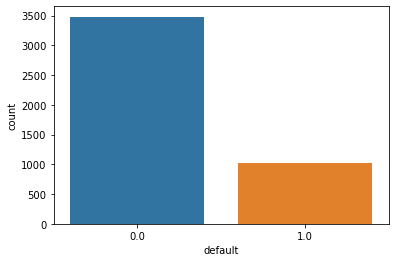

In [34]:
sns.countplot(x='default',data=df_tr)

In [35]:
default_rate = (df_tr['default']==1).sum()/df_tr.shape[0]
default_rate

0.22798846750942559

###### Default rate is 22.8 percentage --> no class imbalance which seems to relevant in default prediction

### BIVARIATE Analysis

In [36]:
def biplot(x, y, df):
    x,y = x, y
    df_ag = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    df_ag1 = df.groupby(x)[y].value_counts().rename('count_var').reset_index()
    df_fin = pd.merge(df_ag, df_ag1, on =[x,y], how = 'inner')[[x,y, 'count_var','percent']]
    df_ag.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
    return(df_fin)

#### CATEGORICAL VARIABLES

#### Default vs Brand

In [37]:
# df_tr['brand'].unique(), df_tr['brand'].nunique()

###### There seems to be data consistency issue with this variable as it seems model no has been put inplace of actual brand for many data points

In [38]:
# biplot('brand','default', df_tr_upd)

#### Default vs Carrier

In [39]:
# df_tr_upd['carrier'].unique()

###### Need to correctly map the names --> normalizing the career names to avoid overfitting due to different splits

In [40]:
# a = biplot('carrier','default', df_tr_upd)
# a.loc[(a.default==1) & (a.count_var>10) & (a.percent>20)]

###### exploring whether a particular carrier has high default rate with considerable count. (approx 10  [ideally 30] )

#### Device Name vs Default

In [41]:
# df_tr_upd['device_name'].unique(), df_tr_upd['device_name'].nunique()

##### Similar issue emancipating from data entry where standardization isnt performed. Extracting the brand from the device name would be helpful in modelling

In [42]:
# a = biplot('device_name','default', df_tr_upd)
# a.loc[(a.default==1) & (a.count_var>10) & (a.percent>20)]

#### GMS Version vs Default

In [43]:
# df_tr_upd['gms_version'].unique(), df_tr_upd['gms_version'].nunique()

In [44]:
# a = biplot('gms_version','default', df_tr_upd)
# a.loc[(a.default==1) & (a.count_var>10) & (a.percent>20)]

#### Manufacturer vs Default

In [45]:
# df_tr_upd['manufacturer'].unique(), df_tr_upd['manufacturer'].nunique()

###### Similar issue of normalization -  device/serial no seems to be ingested at many postions

In [46]:
# a = biplot('manufacturer','default', df_tr_upd)
# a.loc[(a.default==1) & (a.count_var>10) & (a.percent>20)]

###### 638b5f4f86dfed5d has a higher default rate. 3 times more also realme has a default rate which is 30 % more than overall

#### Network_type vs Default

In [47]:
df_tr['network_type'].unique(), df_tr['network_type'].nunique()

(array(['Unknown_0', '4G', 'Wifi', 'Unknown', '3G', '2G'], dtype=object), 6)

,network_type,default,count_var,percent
3,3G,1.0,11,35.483871
5,4G,1.0,630,28.024911
7,Unknown,1.0,49,24.019608


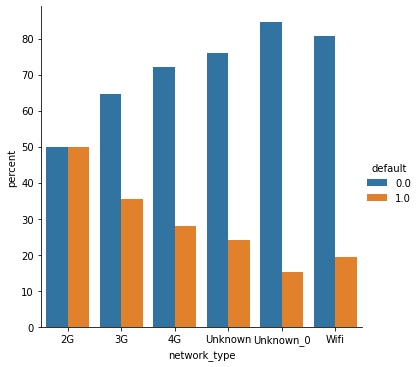

In [48]:
a = biplot('network_type','default', df_tr)
a.loc[(a.default==1) & (a.count_var>10) & (a.percent>20)]

###### Nothing conclusive --> different classes have similar default rate and close to 20  (for min count greater than 10)

#### Screen_dpi vs Default

In [49]:
df_tr['screen_dpi'].unique(), df_tr['screen_dpi'].nunique()

(array(['xhdpi', 'hdpi', 'xxhdpi', 'xxxhdpi', 'mdpi'], dtype=object), 5)

,screen_dpi,default,count_var,percent
1,hdpi,1.0,104,31.231231
4,xhdpi,1.0,677,22.499169
6,xxhdpi,1.0,247,21.256454


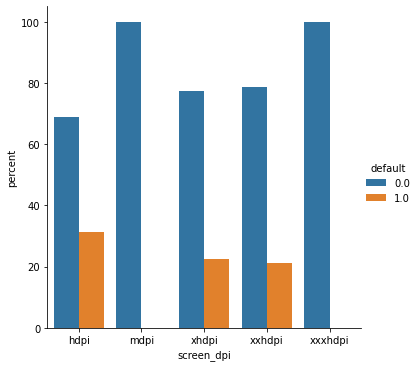

In [50]:
a = biplot('screen_dpi','default', df_tr)
a.loc[(a.default==1) & (a.count_var>10) & (a.percent>20)]

###### Nothing conclusive --> different classes have similar default rate and close to 20 except hdpi which is 40% more from the default rate

#### Numeric Variable

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesS

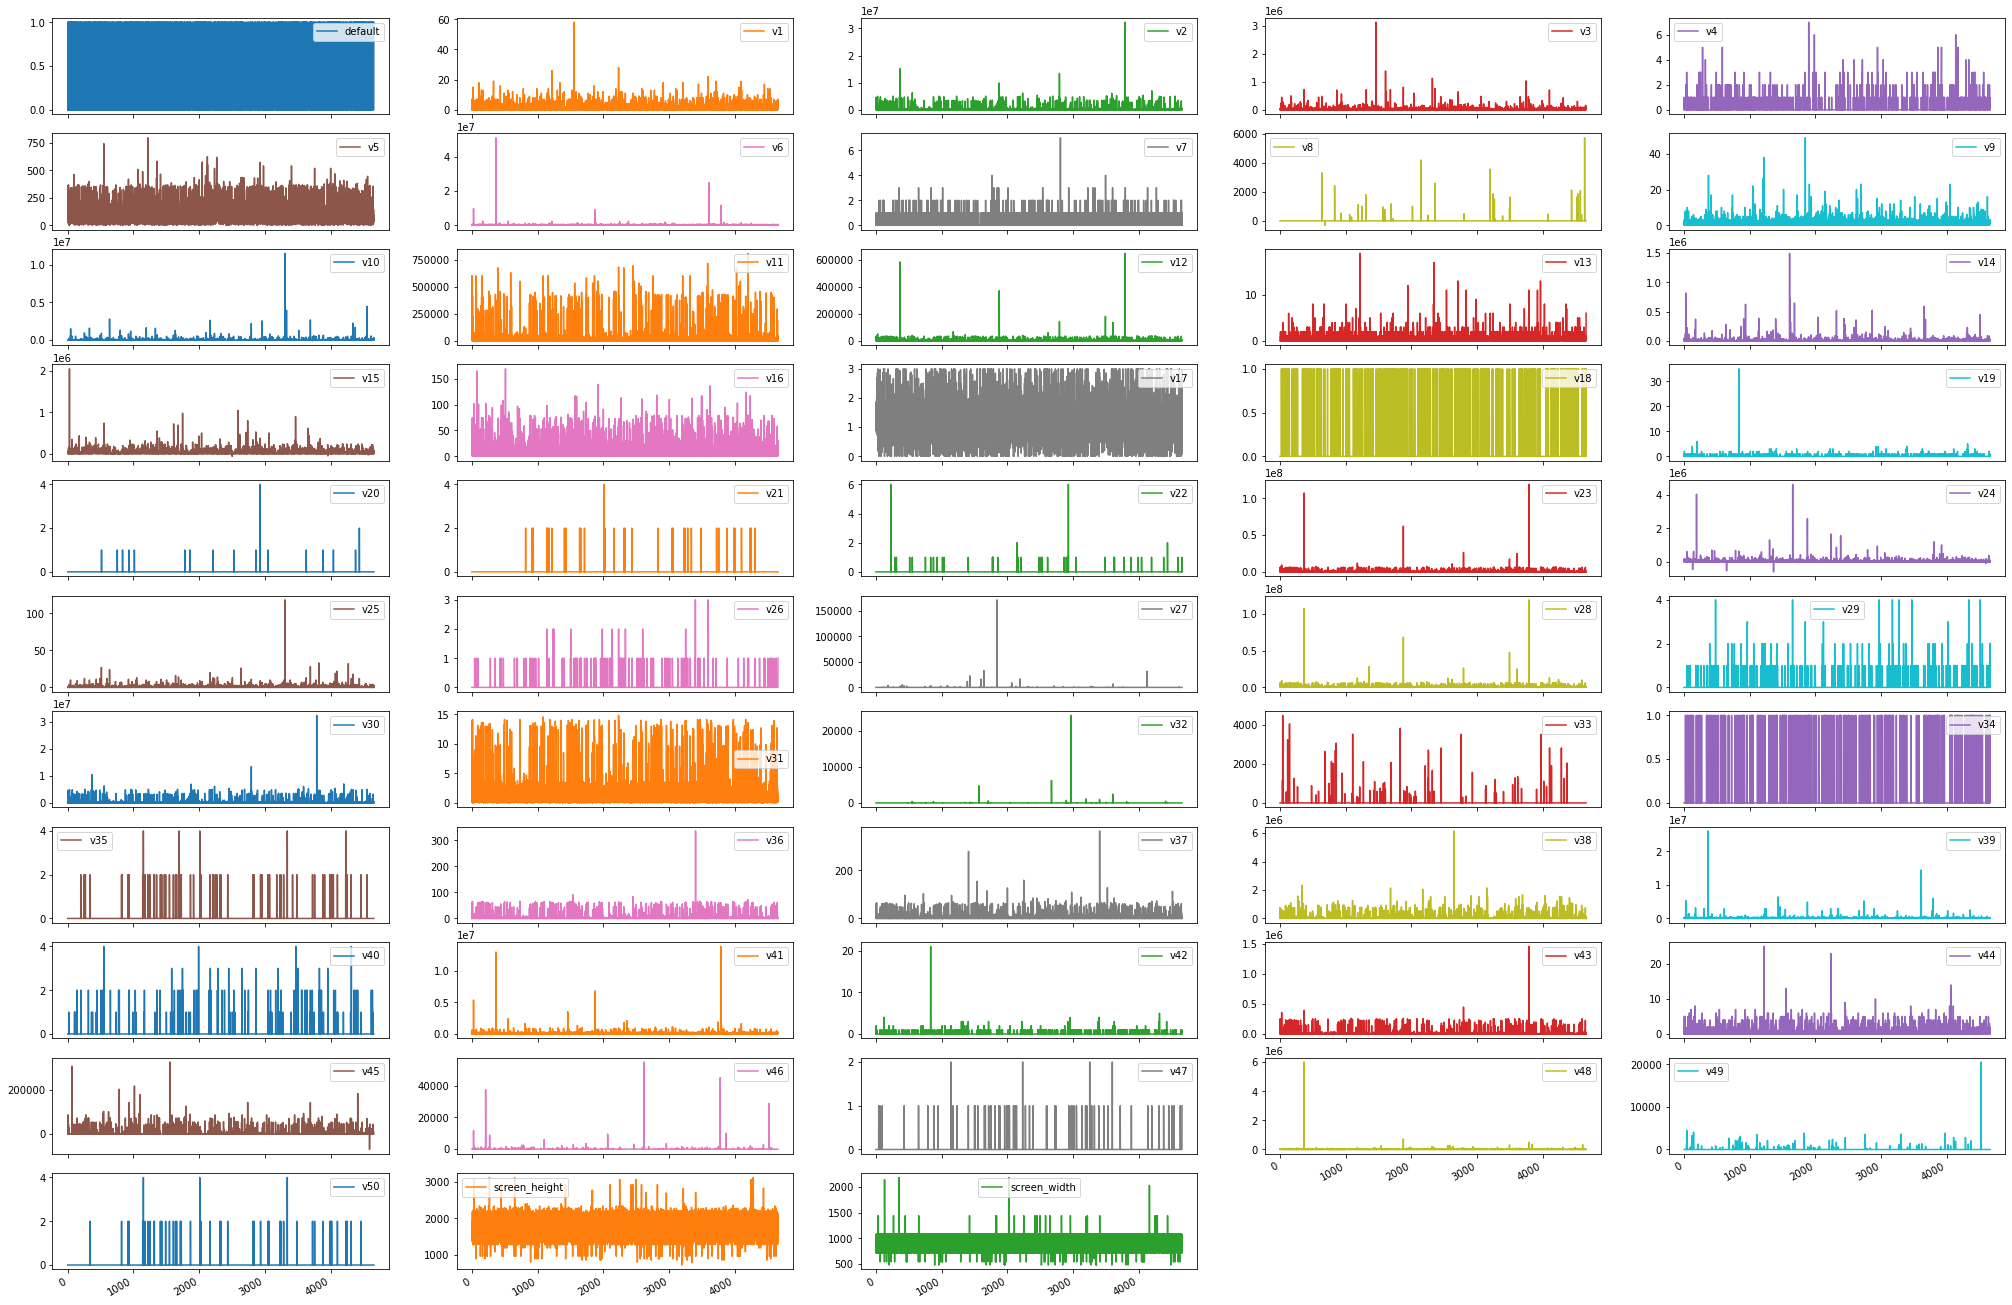

In [51]:
df_tr[num_col].plot(subplots = True, layout =(15,5), figsize = (35,35))

In [52]:
num_col_plot = num_col
num_col_plot.append('default')

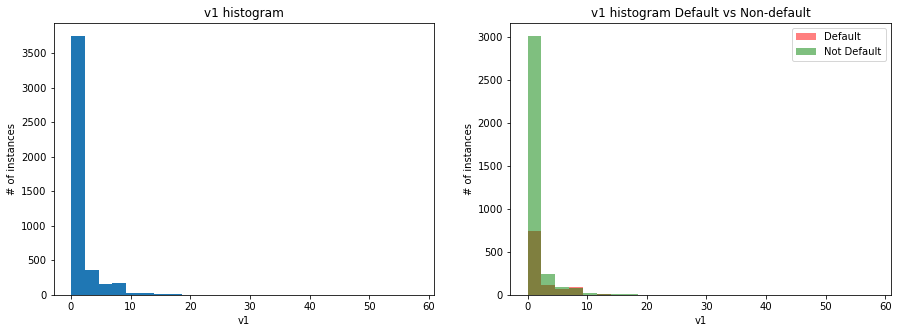

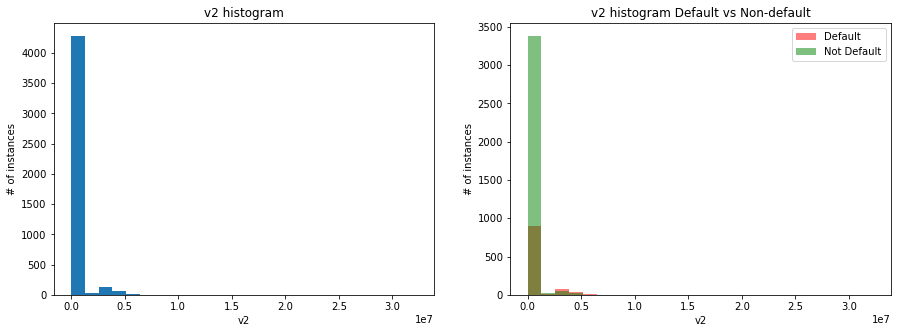

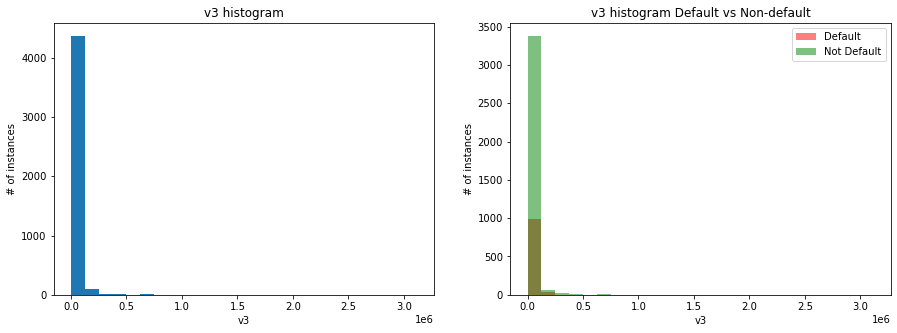

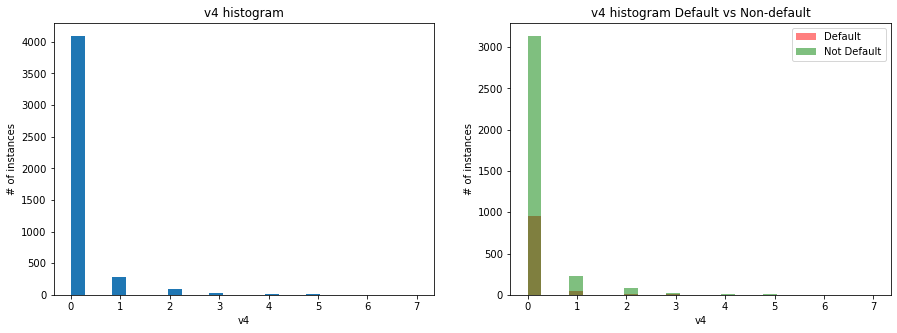

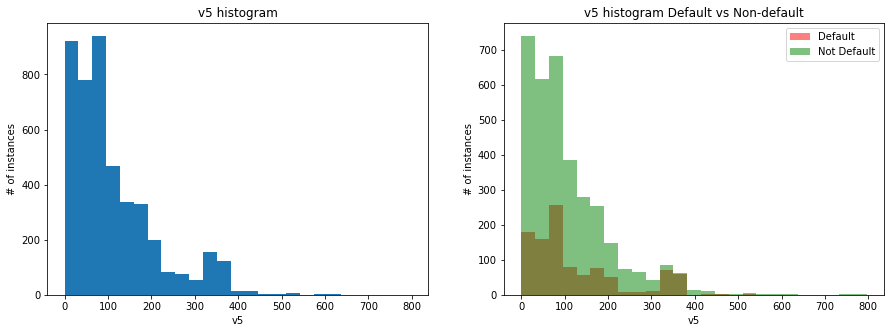

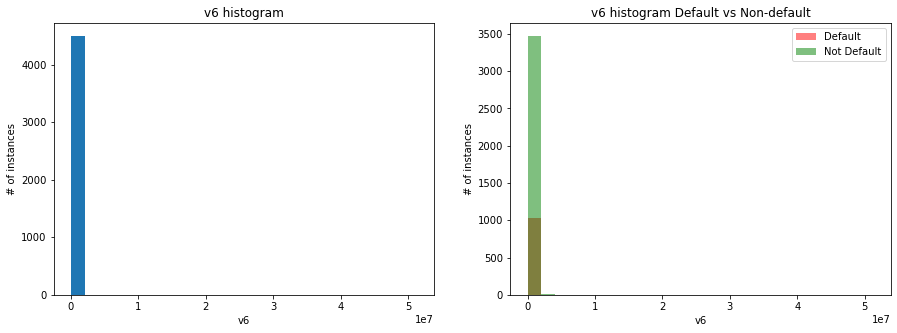

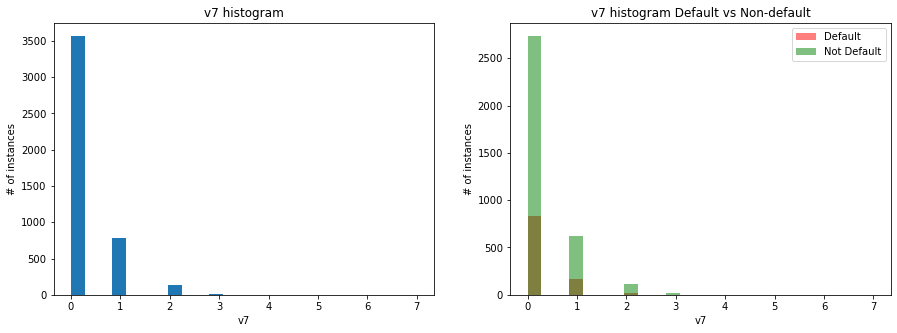

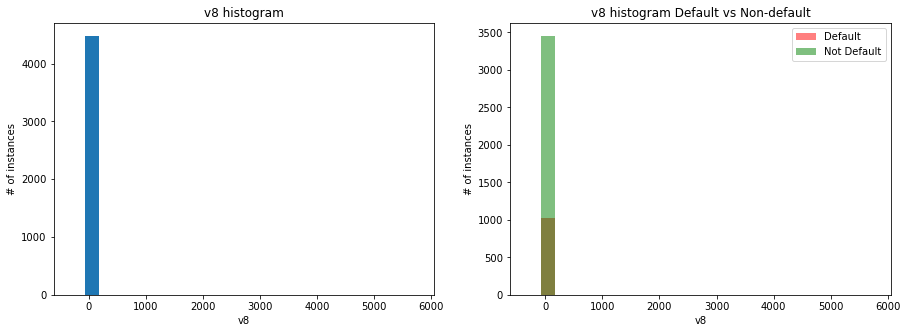

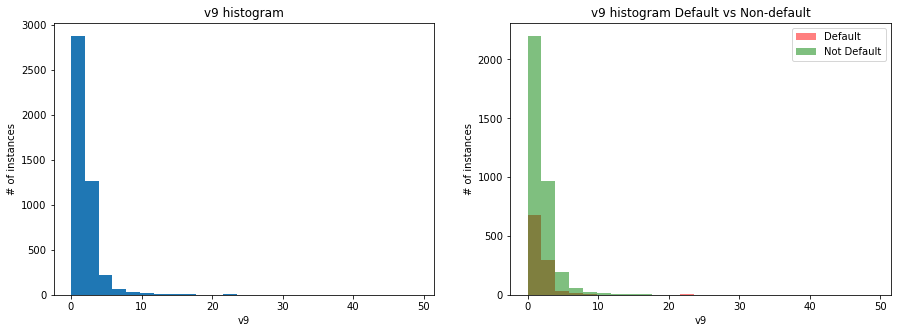

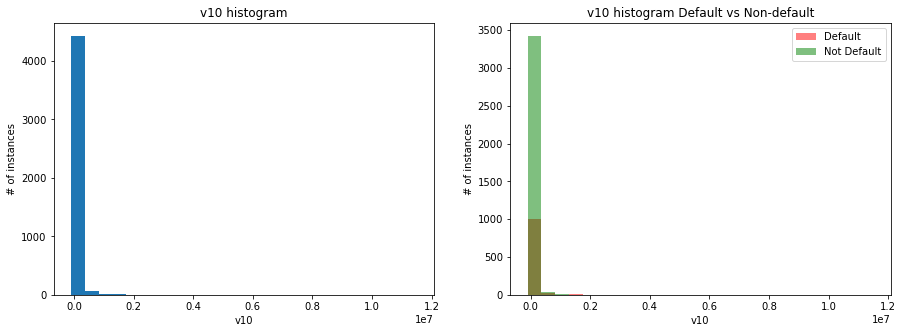

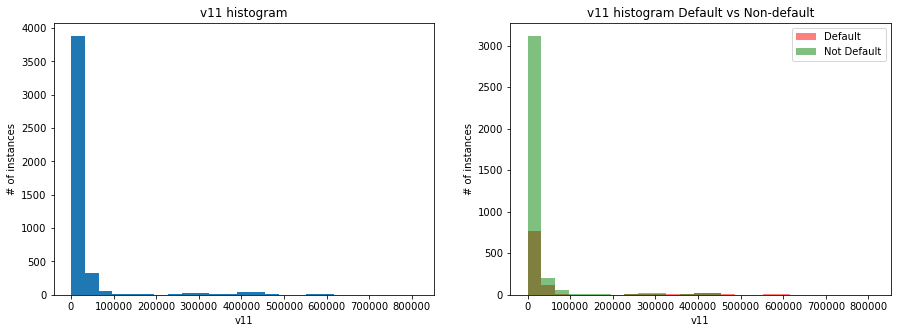

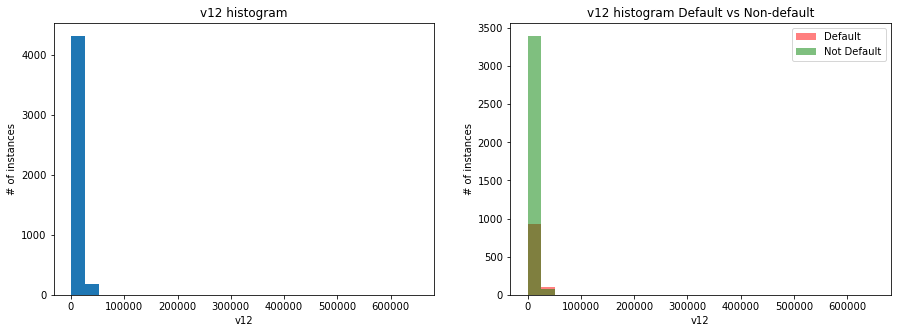

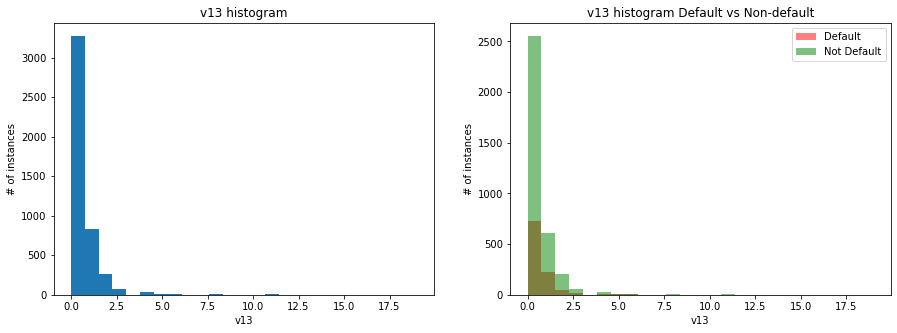

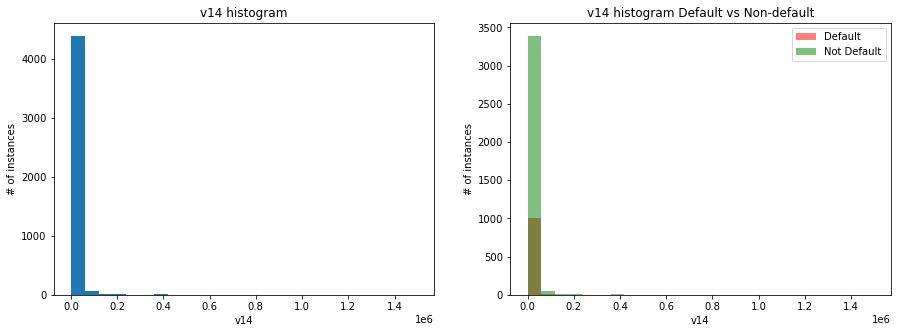

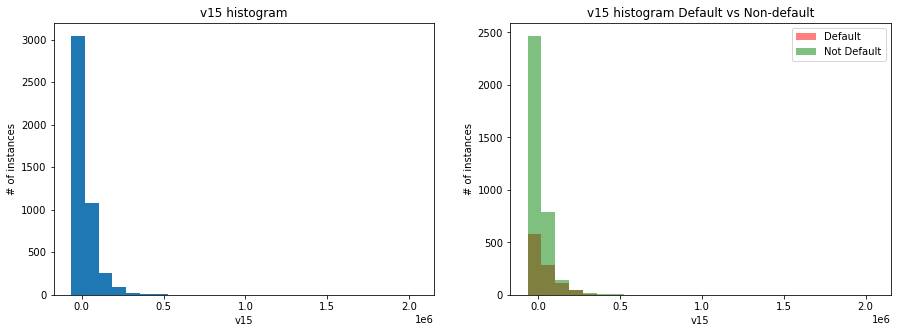

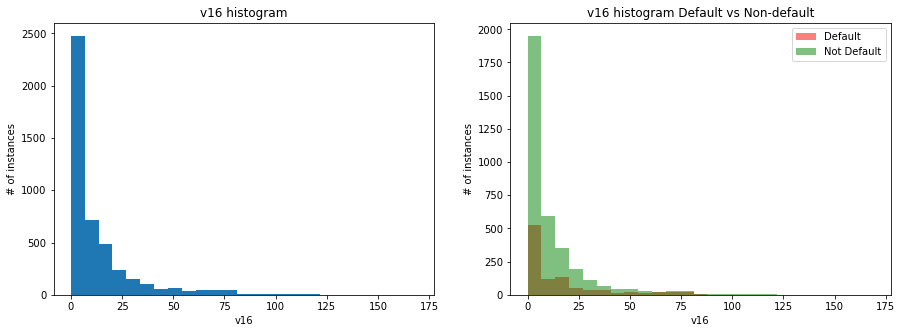

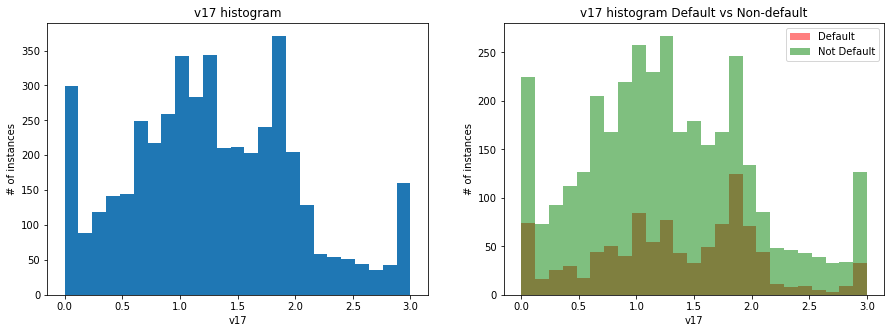

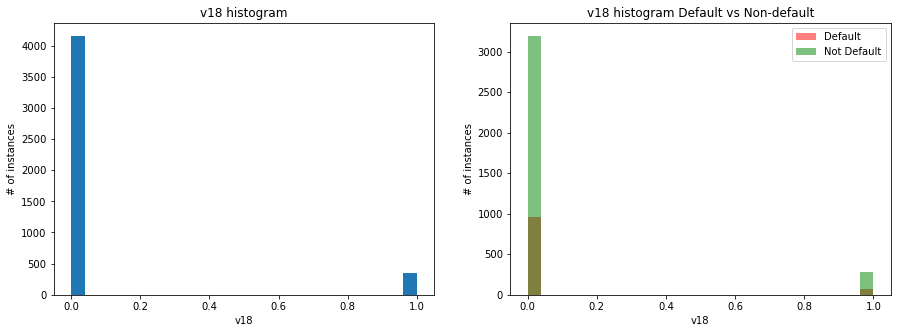

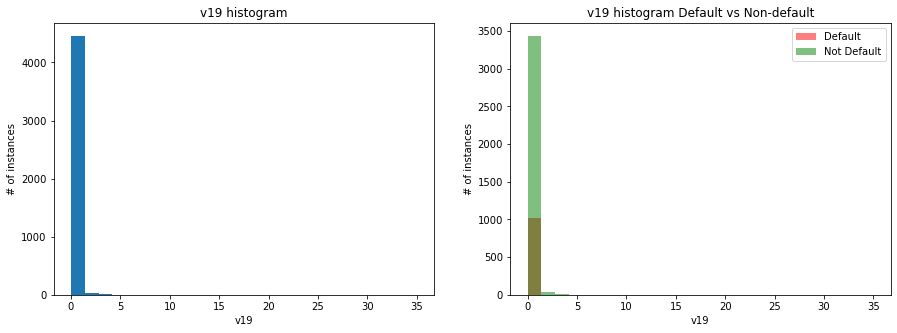

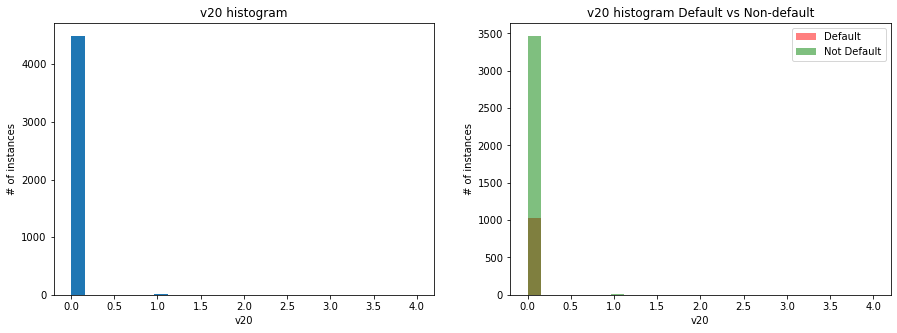

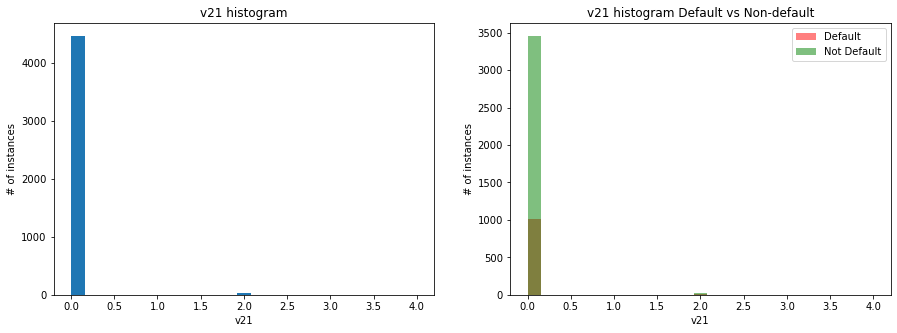

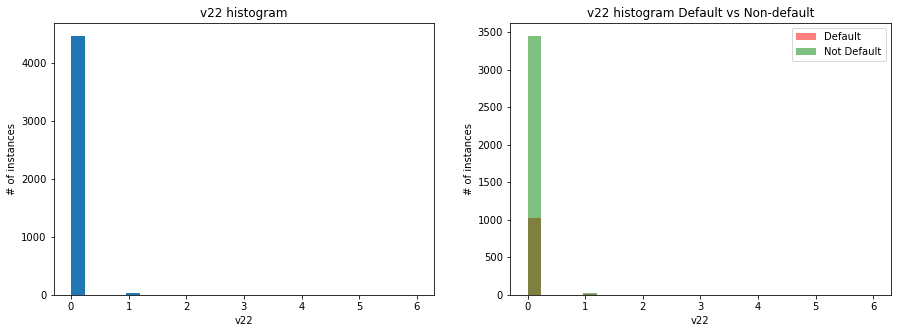

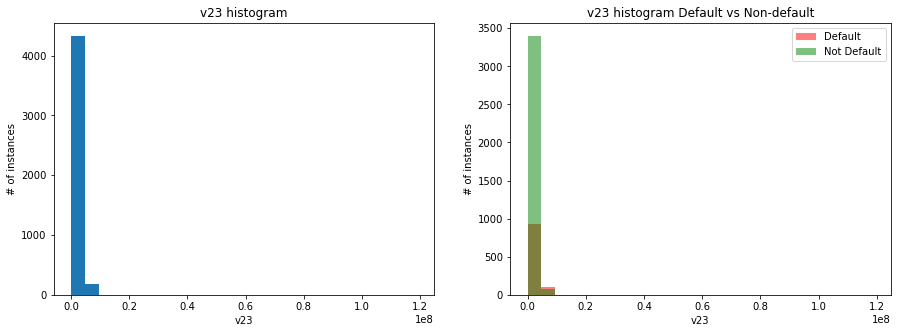

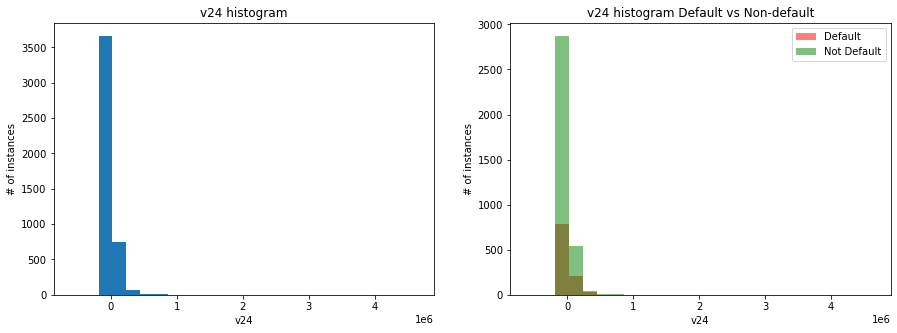

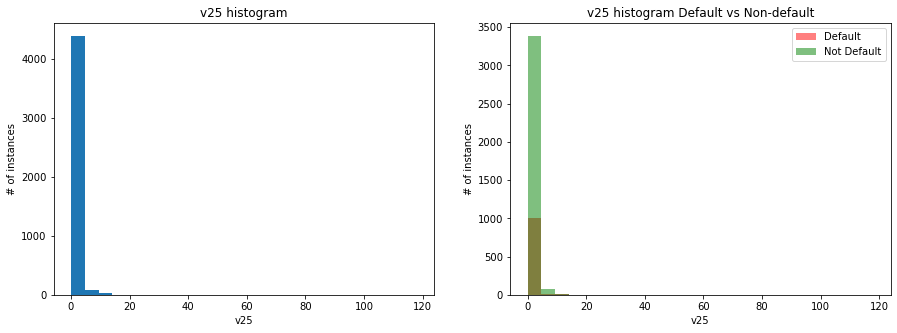

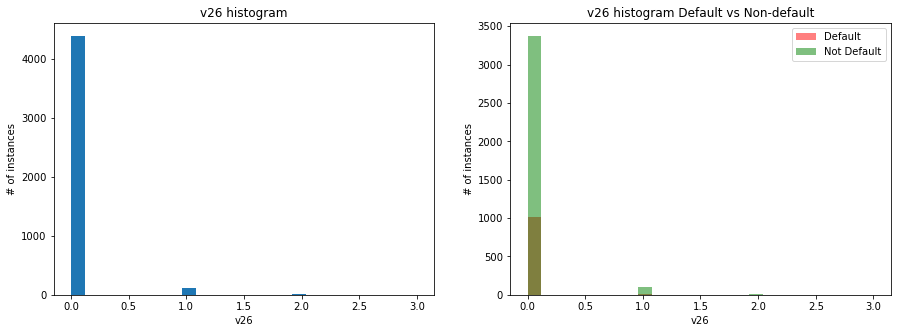

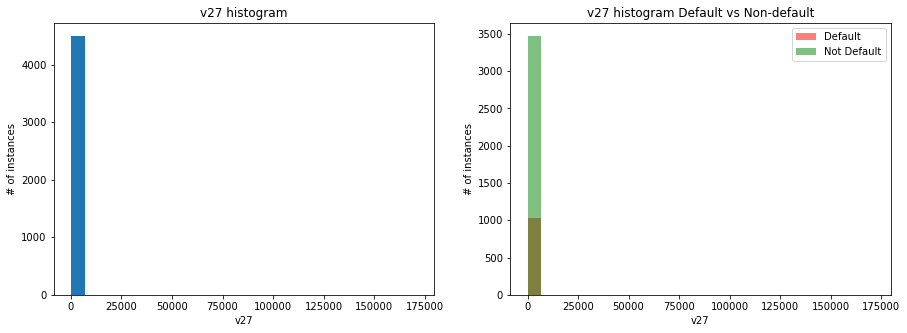

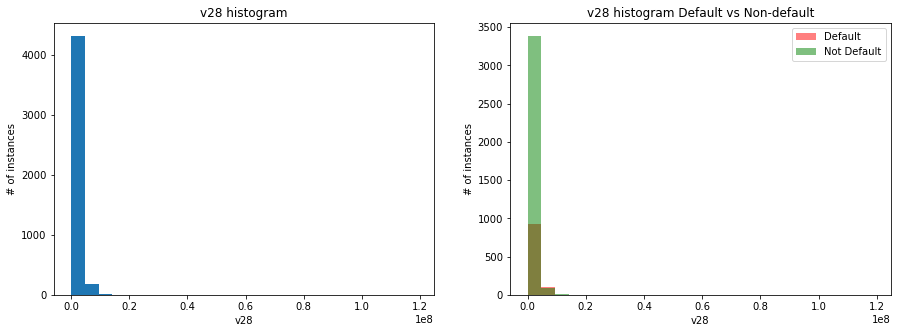

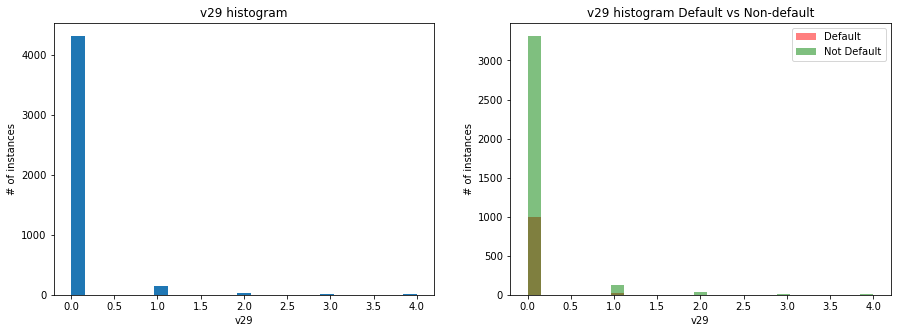

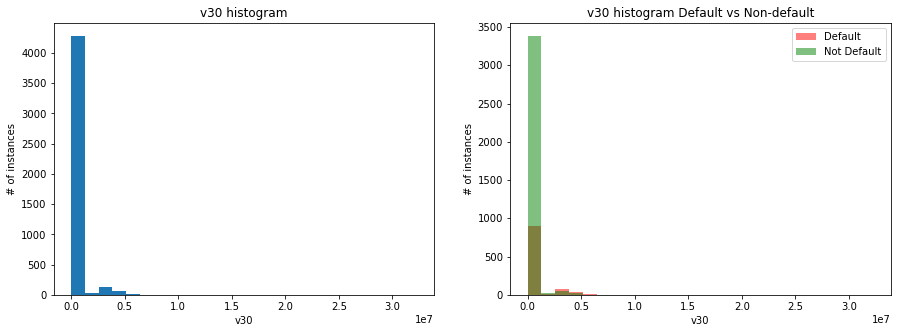

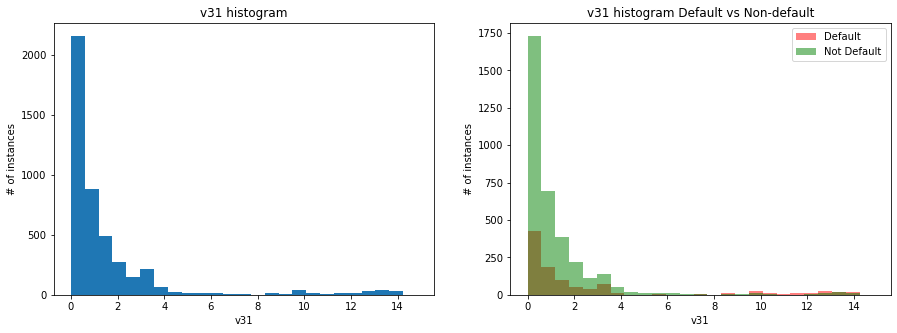

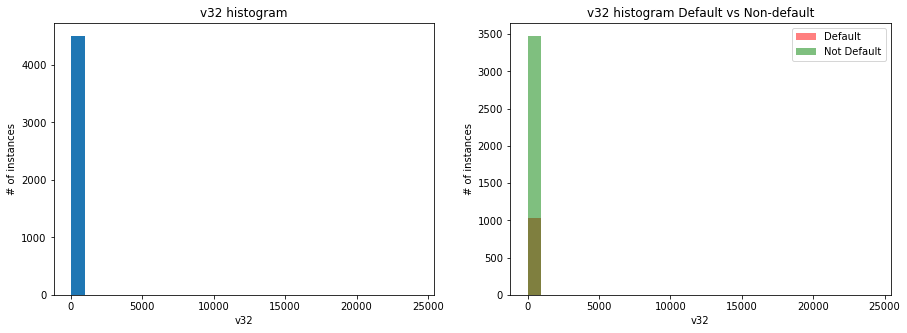

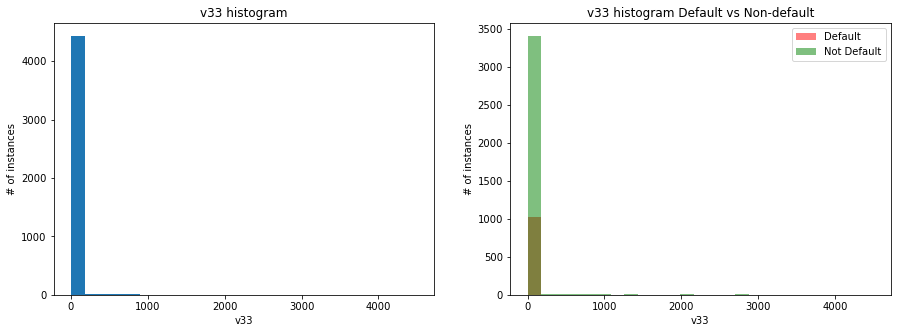

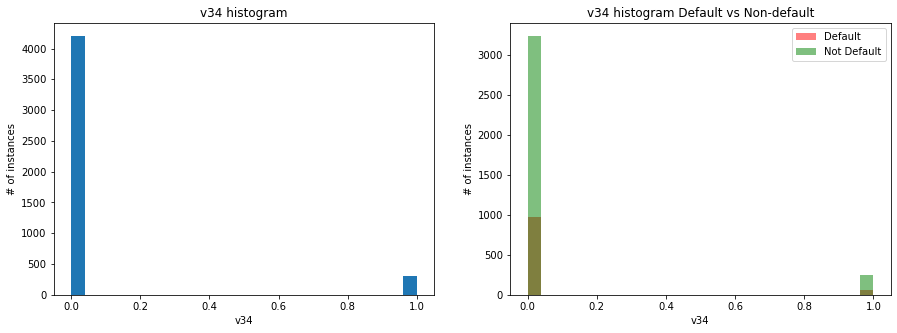

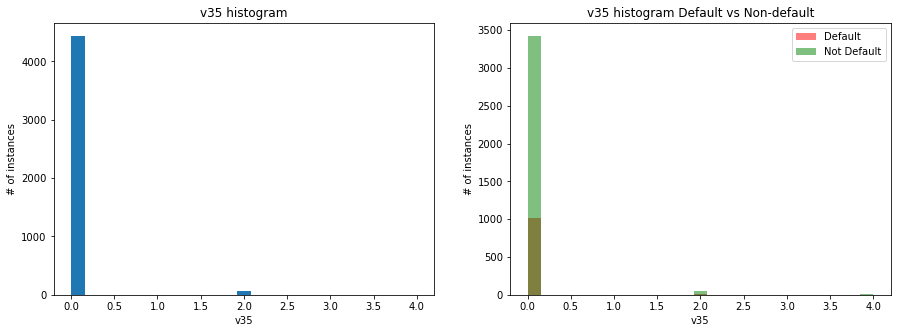

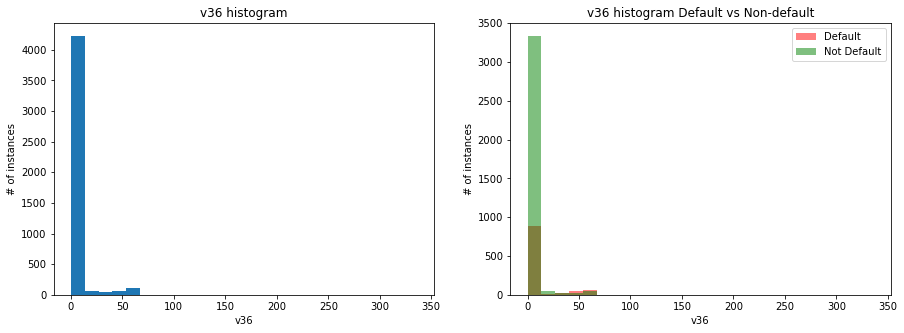

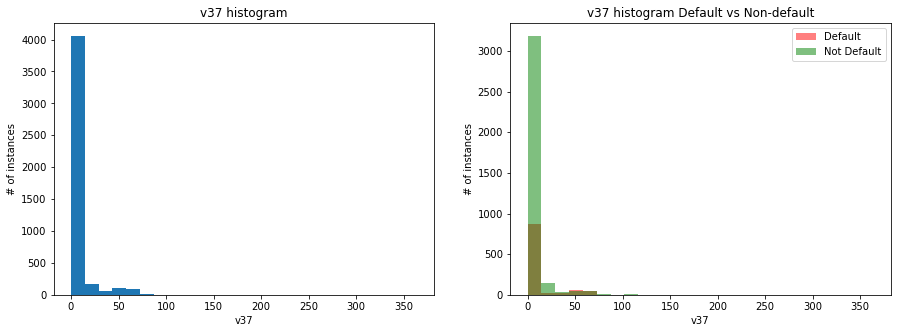

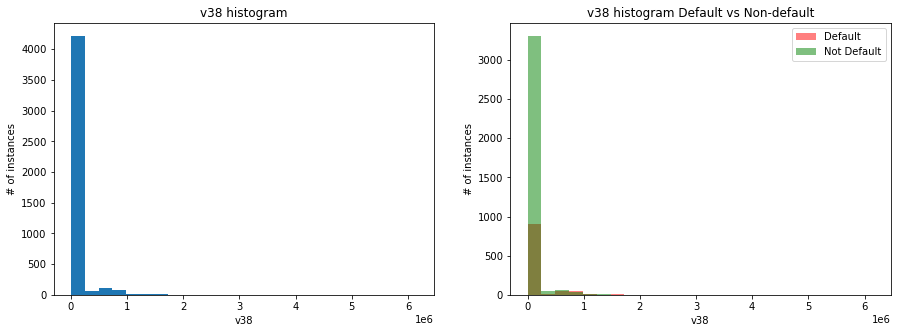

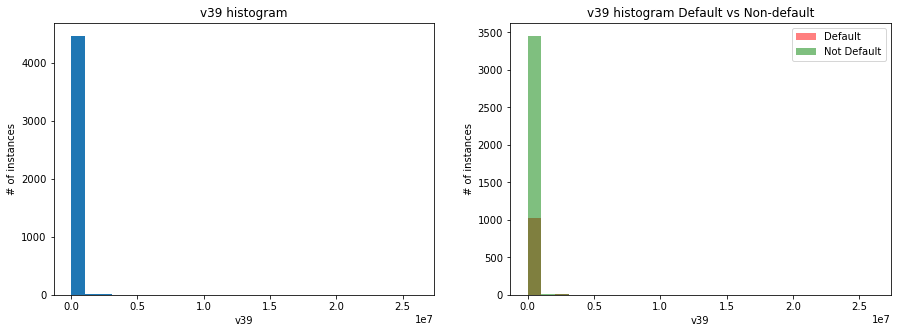

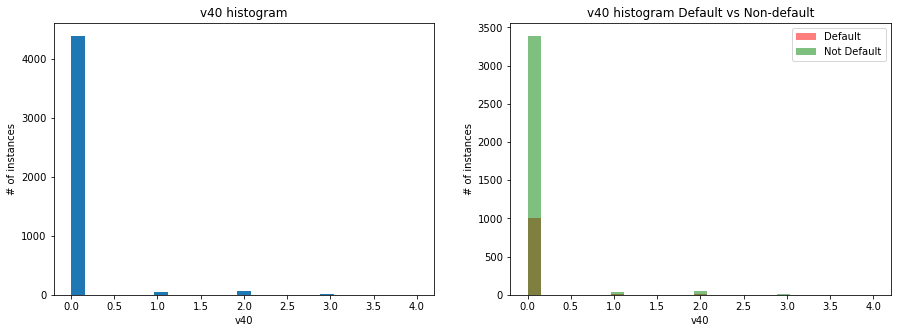

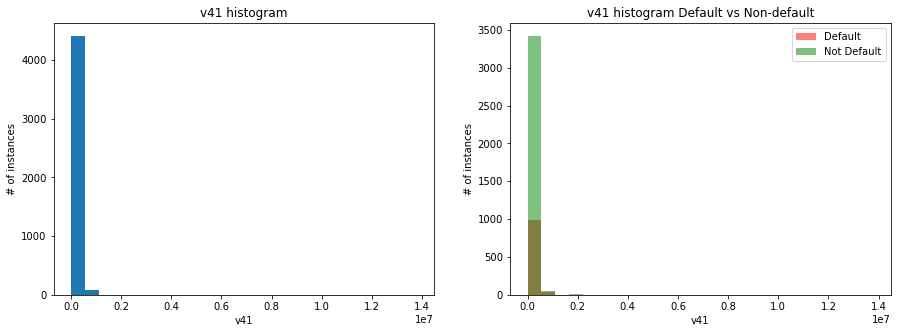

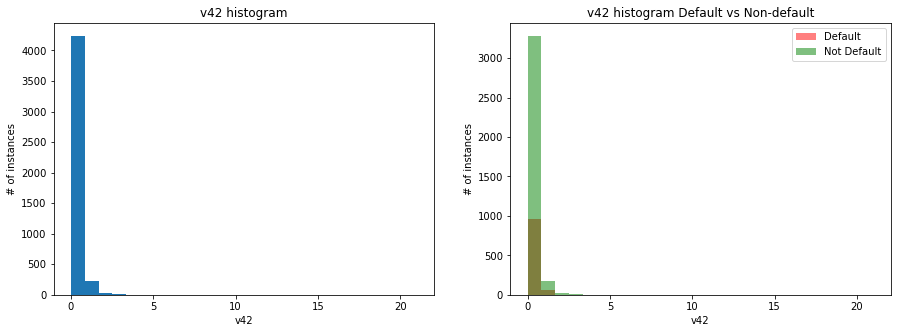

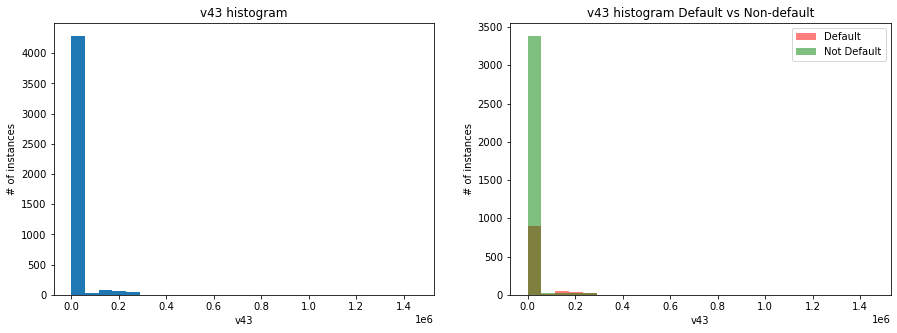

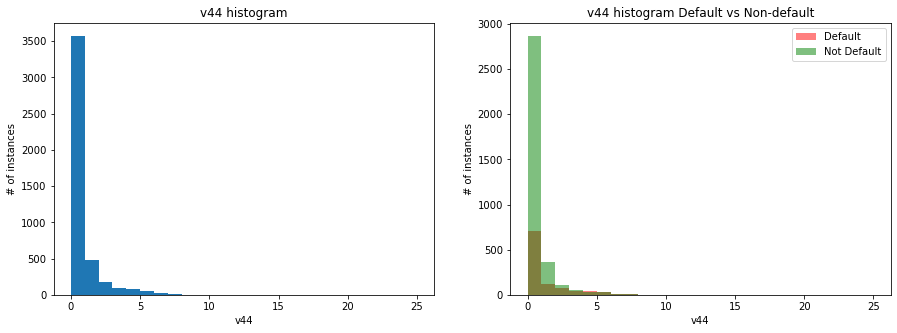

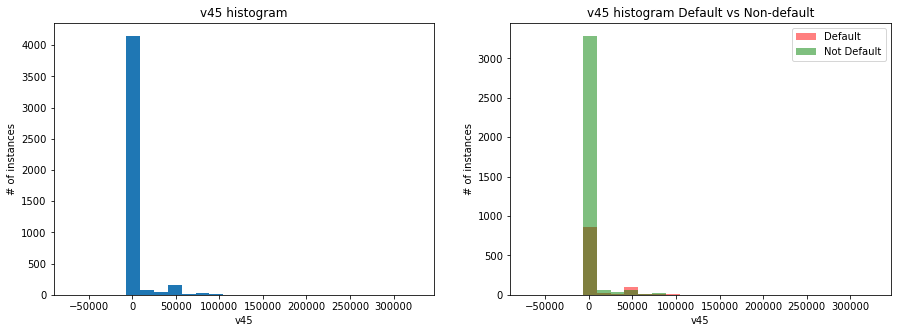

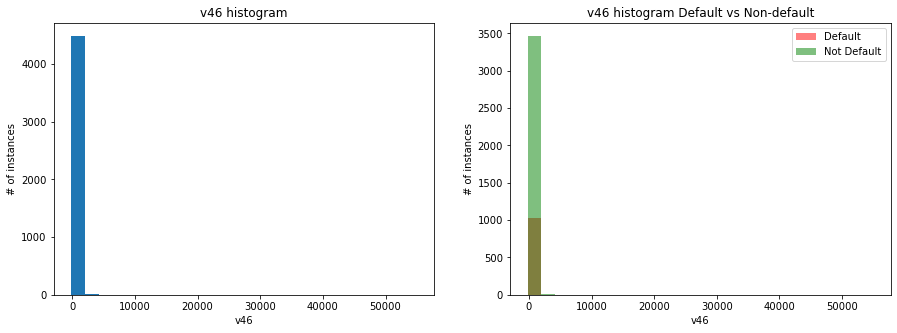

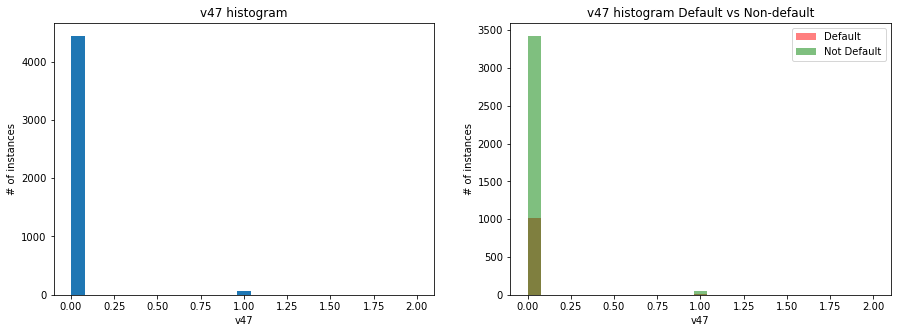

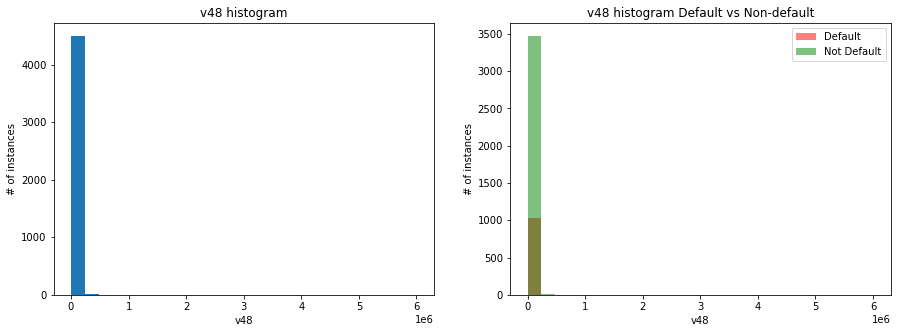

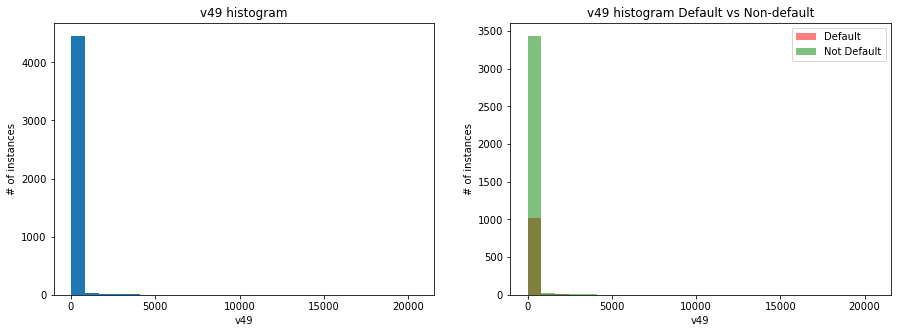

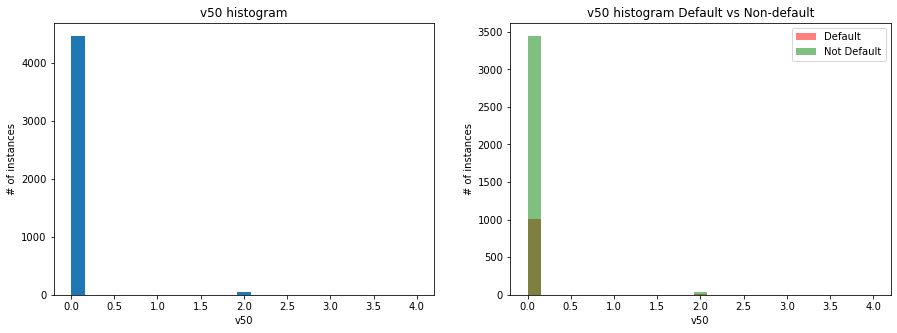

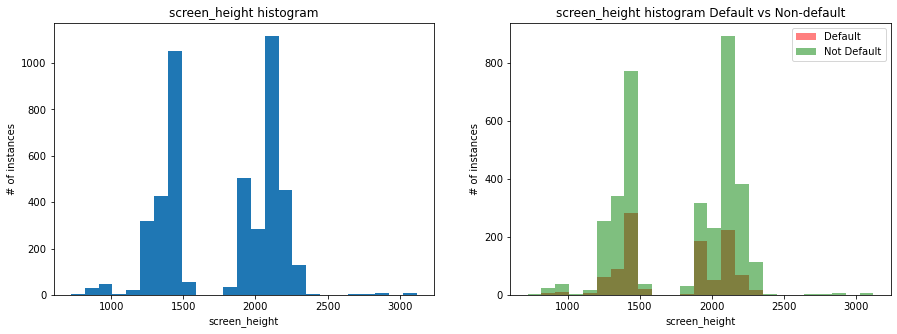

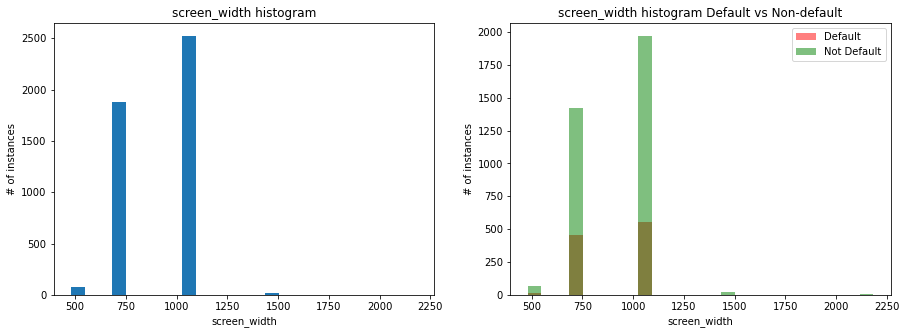

In [53]:
for col in num_col_plot:
    if col == 'default':
        continue
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5))
    value, n_bins, l = ax1.hist(df_tr[col], bins = 25)
    ax1.set_ylabel('# of instances')
    ax1.set_xlabel(col)
    ax1.set_title('{} histogram'.format(col))
    ax2.hist(df_tr[df_tr['default'] == 1][col], bins = n_bins, histtype='bar', label = 'Default', alpha=0.5, color = 'r')
    ax2.hist(df_tr[df_tr['default'] == 0][col], bins = n_bins, histtype='bar', label = 'Not Default', alpha=0.5, color = 'g')
    ax2.legend()
    ax2.set_ylabel('# of instances')
    ax2.set_xlabel(col)
    ax2.set_title('{} histogram Default vs Non-default'.format(col))

###### Most of the plots are right skewed-- need to look for outliers (either removal or percentile capping)

### Normalizing categorical columns

###### This is done on categorical columns to avoid many classes out of error/data entry and to reduce overfitting -- as nodes wont split on those classes

In [54]:
def norm(df):
    for col in cat_col:
        if df[col].dtypes == 'object':
            df[col] = df[col].str.lower()
    return(df)

df_tr = norm(df_tr)
df_test = norm(df_test)

### Normalizing Numerical Columns

In [55]:
trans = MinMaxScaler()

In [56]:
df_tr[num_col] = trans.fit_transform(df_tr[num_col])
df_test[num_col] = trans.transform(df_test[num_col])

### CORRELATION

##### 1) Numerical Features

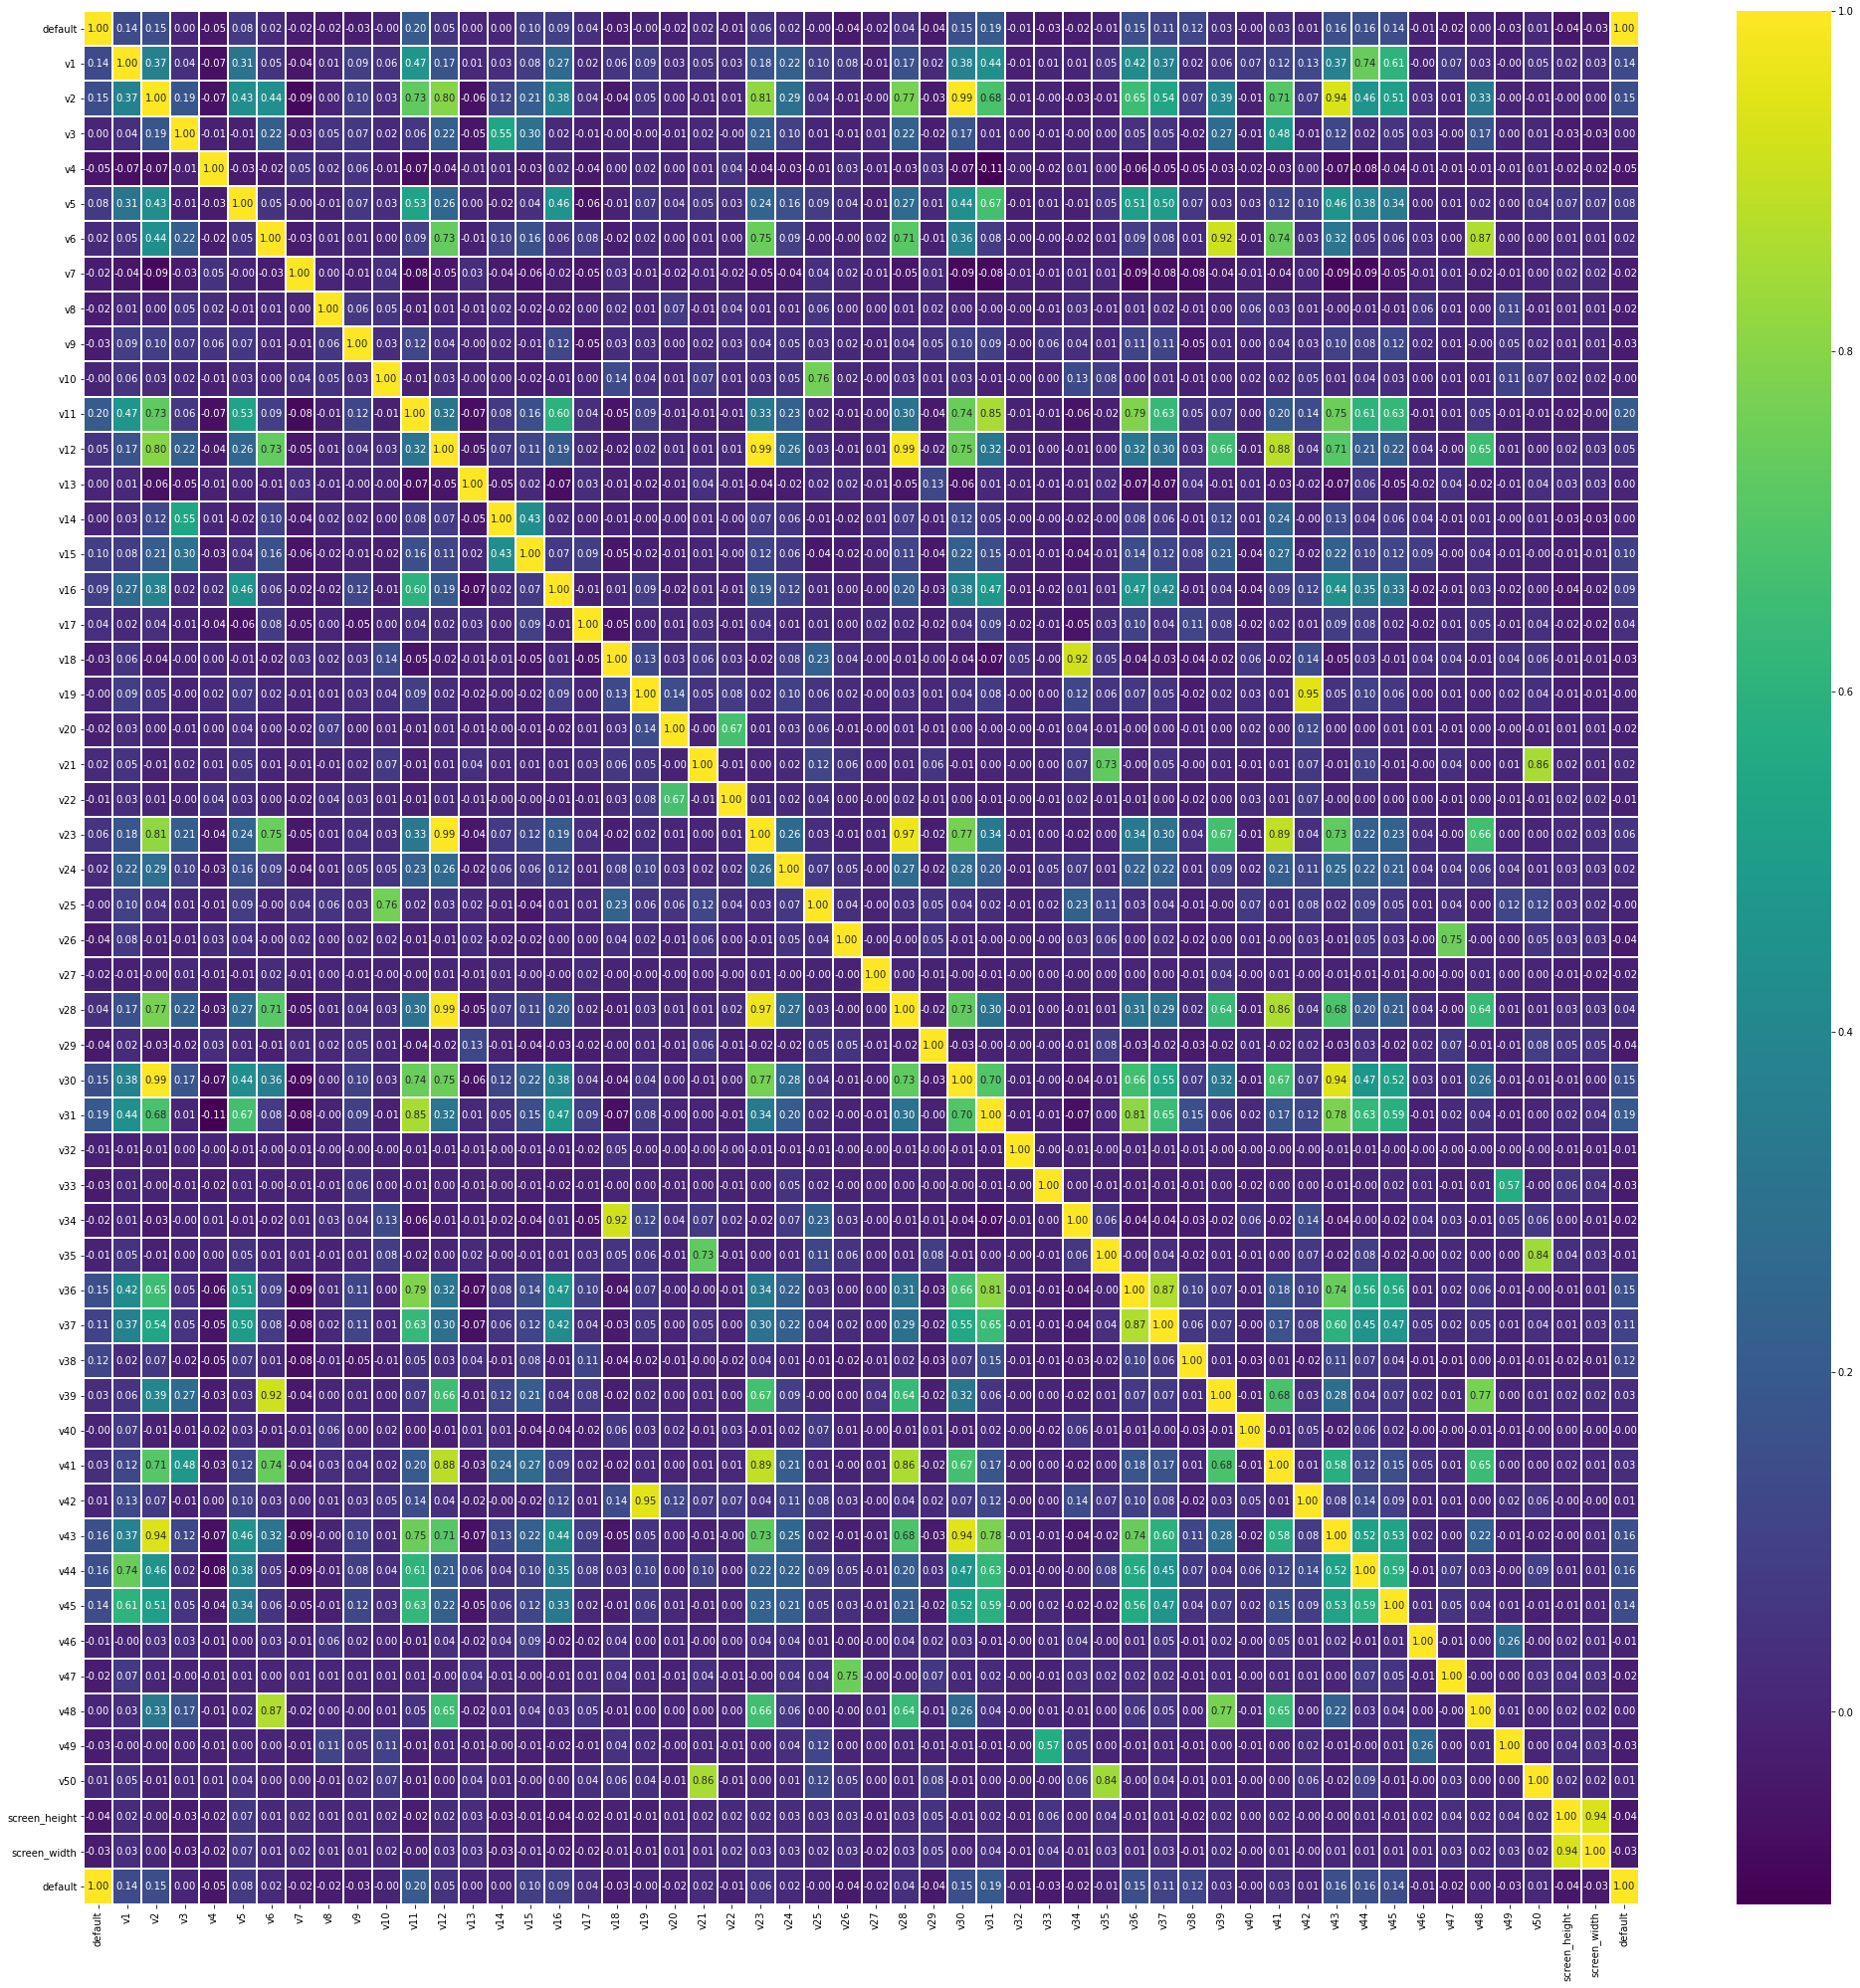

In [57]:
fig, ax= plt.subplots(figsize = (35,35))
sns.heatmap(df_tr[num_col].corr(),cmap="viridis", annot = True, fmt = ".2f", linewidths=1, ax=ax)
plt.show()

In [58]:
num_col

['default',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'v29',
 'v30',
 'v31',
 'v32',
 'v33',
 'v34',
 'v35',
 'v36',
 'v37',
 'v38',
 'v39',
 'v40',
 'v41',
 'v42',
 'v43',
 'v44',
 'v45',
 'v46',
 'v47',
 'v48',
 'v49',
 'v50',
 'screen_height',
 'screen_width',
 'default']

In [59]:
fcor= pd.DataFrame(df_tr[num_col]).corr()

In [60]:
cordf= fcor.where(np.triu(np.ones(fcor.shape), k = 1).astype(np.bool))

In [61]:
cordf = cordf.unstack().reset_index()

In [62]:
cordf.columns = ['var1', 'var2', 'Correlation']

In [63]:
cordf.dropna(subset = ['Correlation'], inplace = True)

In [64]:
mat = cordf.sort_values(by = 'Correlation', ascending = False)

In [65]:
maxc = mat[mat['Correlation'] > 0.8].iloc[1:]

In [66]:
maxc

,var1,var2,Correlation
1622,v30,v2,0.994795
1254,v23,v12,0.993624
1524,v28,v12,0.987133
1535,v28,v23,0.972888
2287,v42,v19,0.951812
2352,v43,v30,0.943773
2859,screen_width,screen_height,0.935958
2324,v43,v2,0.935588
1854,v34,v18,0.921378
2112,v39,v6,0.915769


In [67]:
list1 = list(maxc['var1'])
list2 = list(maxc['var2'])
x, y, z = [], [], []
x = [i for i in list1 if i not in list2]
y = [i for i in list2 if i not in list1]
z = [i for i in list1 if i in list2]

In [68]:
set(x)

{'screen_width', 'v34', 'v37', 'v39', 'v41', 'v42', 'v43', 'v48', 'v50'}

In [69]:
set(y) #-- Need to drop these columns

{'screen_height', 'v11', 'v12', 'v18', 'v19', 'v2', 'v21', 'v35', 'v6'}

In [70]:
set(z) #-- Need to drop these columns as well

{'v23', 'v28', 'v30', 'v31', 'v36'}

In [71]:
h = maxc.loc[maxc['var2'].isin(z)]
h

,var1,var2,Correlation
1535,v28,v23,0.972888
2352,v43,v30,0.943773
2237,v41,v23,0.894401
2034,v37,v36,0.868421
2242,v41,v28,0.861595
1975,v36,v31,0.810238


In [72]:
drop_cor_col = list(set(y))
drop_cor_col.extend(list(set(z)))

num_col = list(set(num_col) - set(drop_cor_col))

In [73]:
np.sort(drop_cor_col)

array(['screen_height', 'v11', 'v12', 'v18', 'v19', 'v2', 'v21', 'v23',
       'v28', 'v30', 'v31', 'v35', 'v36', 'v6'], dtype='<U13')

In [74]:
df_tr.drop(drop_cor_col, axis = 1, inplace = True)
df_test.drop(drop_cor_col, axis = 1, inplace = True)

#### OUTLIER Analysis and imputation

###### Extracting the index for different variables which are outlier as per 3sigma rule, --> imputing those variables with median and taking the intersection of all index and the common index would be taken and removed from data

In [75]:
def detect_outliers(df,features):
    outlier_indices = []
    #iterate over columns of features
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
                        #print(Q1,Q3,IQR)
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces( a list of indeces of outliers for a feature columns)   
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces (append the outlier indices that we found  for column to the list of outlier indices )
        outlier_indices.extend(outlier_list_col)
    # select observation containing more than outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 20)
    
    return multiple_outliers

In [76]:
from collections import Counter

In [77]:
df_tr.columns

Index(['decision_id', 'default', 'v1', 'v3', 'v4', 'v5', 'v7', 'v8', 'v9',
       'v10', 'v13', 'v14', 'v15', 'v16', 'v17', 'v20', 'v22', 'v24', 'v25',
       'v26', 'v27', 'v29', 'v32', 'v33', 'v34', 'v37', 'v38', 'v39', 'v40',
       'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50',
       'network_type', 'screen_width', 'screen_dpi', 'v27_nflag', 'v1_nflag',
       'v44_nflag', 'v45_nflag'],
      dtype='object')

In [78]:
np.sort(num_col)

array(['default', 'screen_width', 'v1', 'v10', 'v13', 'v14', 'v15', 'v16',
       'v17', 'v20', 'v22', 'v24', 'v25', 'v26', 'v27', 'v29', 'v3',
       'v32', 'v33', 'v34', 'v37', 'v38', 'v39', 'v4', 'v40', 'v41',
       'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v5',
       'v50', 'v7', 'v8', 'v9'], dtype='<U12')

In [79]:
ind = detect_outliers(df_tr, num_col)
df_tr.drop(ind, axis=0, inplace = True)

In [80]:
df_tr.shape

(4509, 46)

### Modelling

In [81]:
df_tr.shape

(4509, 46)

In [82]:
def one_hot_encoder(dfr, categorical_columns=None, nan_as_category=True):
    df = dfr.copy()
    """Create a new column for each categorical value in categorical columns. """
    original_columns = list(df.columns)
    if not categorical_columns:
        categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    categorical_columns = [c for c in df.columns if c not in original_columns]
    return df, categorical_columns

#### Encoding

In [83]:
df_tr, cat = one_hot_encoder(df_tr, cat_col, False)
df_test, cat2 = one_hot_encoder(df_test, cat_col, False)

In [84]:
df_tr.shape, df_test.shape

((4509, 55), (1585, 55))

In [85]:
len(cat), len(cat2)

(11, 11)

In [86]:
len([c for c in cat if c not in cat2]), len([c for c in cat2 if c not in cat])

(0, 0)

In [87]:
len(set(cat).intersection(set(cat2))), len(set(cat).union(set(cat2)))

(11, 11)

In [88]:
X, y = df_tr.drop(['decision_id', 'default'], axis=1), df_tr['default']
X_test = df_test.drop(['default'], axis=1)

In [89]:
# define models and parameters
model = LogisticRegression()

In [90]:
solvers = ['lbfgs', 'liblinear']
penalty = ['l2', 'l1', 'elasticnet', None]
c_values = [100, 10, 1.0, 0.1]

In [91]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [92]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [93]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X, y)

In [94]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.111854 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.111527 (0.018229) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.111854 (0.016553) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': None, 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': None, 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.107641 (0.018723) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.110552 (0.018034) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.0000

In [95]:
best_parameters = grid_result.best_params_

In [96]:
best_parameters

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

### Prediction

In [97]:
pred = grid_result.best_estimator_.predict(X_test[[col for col in X_test.columns if col != 'decision_id']])

In [98]:
print(len(pred), sum(pred)), print(X_test.shape)

1585 19.0
(1585, 54)


(None, None)